In [1]:
from tabulate import tabulate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date,datetime,time,timezone

In [7]:
wti = pd.read_csv(r"C:\Users\Kevin\Downloads\DCOILWTICO.csv")
wti.head()

,DATE,DCOILWTICO
0,2018-12-18,46.12
1,2018-12-19,47.96
2,2018-12-20,45.64
3,2018-12-21,45.38
4,2018-12-24,.


In [9]:
wti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        1305 non-null   object
 1   DCOILWTICO  1305 non-null   object
dtypes: object(2)
memory usage: 20.5+ KB


In [10]:
wti['N_DATE'] = pd.to_datetime(wti['DATE'])
wti['N_DATE']

0      2018-12-18
1      2018-12-19
2      2018-12-20
3      2018-12-21
4      2018-12-24
          ...    
1300   2023-12-12
1301   2023-12-13
1302   2023-12-14
1303   2023-12-15
1304   2023-12-18
Name: N_DATE, Length: 1305, dtype: datetime64[ns]

In [11]:
df = wti.drop(['DATE'], axis=1)
df.head()


,DCOILWTICO,N_DATE
0,46.12,2018-12-18
1,47.96,2018-12-19
2,45.64,2018-12-20
3,45.38,2018-12-21
4,.,2018-12-24


In [12]:
df.set_index('N_DATE', inplace = True)
df.head()

,DCOILWTICO
N_DATE,
2018-12-18,46.12
2018-12-19,47.96
2018-12-20,45.64
2018-12-21,45.38
2018-12-24,.


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1305 entries, 2018-12-18 to 2023-12-18
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DCOILWTICO  1305 non-null   object
dtypes: object(1)
memory usage: 20.4+ KB


In [14]:
df['2016-11-04':'2016-11-10']

,DCOILWTICO
N_DATE,


In [18]:
pd.date_range(start = '2021-01-01',
              end = '2021-12-31', periods = 10,
              freq = None, tz='Asia/Seul')

UnknownTimeZoneError: 'Asia/Seul'

In [19]:
p_data = pd.period_range(start = '2020-1-1', end='2020-12-31',
                        periods = None,
                        freq = 'M')
p_data


PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'],
            dtype='period[M]')

In [20]:
df = pd.read_csv(r"C:\Users\Kevin\Downloads\capture-fisheries-vs-aquaculture.csv")
df.head()

,Entity,Code,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons)
0,Afghanistan,AFG,1969,60.0,400.0
1,Afghanistan,AFG,1970,60.0,400.0
2,Afghanistan,AFG,1971,60.0,500.0
3,Afghanistan,AFG,1972,60.0,500.0
4,Afghanistan,AFG,1973,60.0,500.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12727 entries, 0 to 12726
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      12727 non-null  object 
 1   Code                                        11901 non-null  object 
 2   Year                                        12727 non-null  int64  
 3   Aquaculture production (metric tons)        9710 non-null   float64
 4   Capture fisheries production (metric tons)  12569 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 497.3+ KB


In [23]:
df.drop(['Code'], axis =1 , inplace = True)
df.head()

,Entity,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons)
0,Afghanistan,1969,60.0,400.0
1,Afghanistan,1970,60.0,400.0
2,Afghanistan,1971,60.0,500.0
3,Afghanistan,1972,60.0,500.0
4,Afghanistan,1973,60.0,500.0


In [24]:
df.isnull().sum()

Entity                                           0
Year                                             0
Aquaculture production (metric tons)          3017
Capture fisheries production (metric tons)     158
dtype: int64

In [25]:
change_value = 0 
df.fillna(change_value, inplace=True)
df.isnull().sum()

Entity                                        0
Year                                          0
Aquaculture production (metric tons)          0
Capture fisheries production (metric tons)    0
dtype: int64

In [28]:
df['new_Year']= pd. to_datetime(df['Year'].astype(str), 
                                format = '%Y')
df.set_index('new_Year', inplace = True)
df.drop(['Year'], axis=1, inplace=True)

df.head()

,Entity,Aquaculture production (metric tons),Capture fisheries production (metric tons)
new_Year,,,
1969-01-01,Afghanistan,60.0,400.0
1970-01-01,Afghanistan,60.0,400.0
1971-01-01,Afghanistan,60.0,500.0
1972-01-01,Afghanistan,60.0,500.0
1973-01-01,Afghanistan,60.0,500.0


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12727 entries, 1969-01-01 to 1969-01-01
Data columns (total 3 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      12727 non-null  object 
 1   Aquaculture production (metric tons)        12727 non-null  float64
 2   Capture fisheries production (metric tons)  12727 non-null  float64
dtypes: float64(2), object(1)
memory usage: 397.7+ KB


In [30]:
new_df=df.sort_index()
new_df.head()

,Entity,Aquaculture production (metric tons),Capture fisheries production (metric tons)
new_Year,,,
1960-01-01,Cayman Islands,0.0,0.0
1960-01-01,Bahrain,0.0,1500.0
1960-01-01,Northern Mariana Islands,0.0,100.0
1960-01-01,Norway,1900.0,1609362.0
1960-01-01,Oman,0.0,55000.0


In [32]:
new_df['Entity'] = new_df['Entity'].astype('category')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12727 entries, 1960-01-01 to 2018-01-01
Data columns (total 3 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   Entity                                      12727 non-null  category
 1   Aquaculture production (metric tons)        12727 non-null  float64 
 2   Capture fisheries production (metric tons)  12727 non-null  float64 
dtypes: category(1), float64(2)
memory usage: 333.1 KB


In [33]:
new_df['Entity'].value_counts()

Afghanistan                   59
Portugal                      59
Myanmar                       59
Namibia                       59
Nauru                         59
                              ..
Serbia                        13
Saint Martin (French part)    12
Sint Maarten (Dutch part)      8
Curacao                        8
South Sudan                    7
Name: Entity, Length: 231, dtype: int64

In [35]:
g=new_df.groupby(['new_Year'])
g.head()

,Entity,Aquaculture production (metric tons),Capture fisheries production (metric tons)
new_Year,,,
1960-01-01,Cayman Islands,0.000000e+00,0.0
1960-01-01,Bahrain,0.000000e+00,1500.0
1960-01-01,Northern Mariana Islands,0.000000e+00,100.0
1960-01-01,Norway,1.900000e+03,1609362.0
1960-01-01,Oman,0.000000e+00,55000.0
...,...,...,...
2018-01-01,Middle income,1.049401e+08,69096776.0
2018-01-01,Georgia,2.381500e+03,213077.0
2018-01-01,Samoa,1.292900e+01,9766.0


In [36]:
for key, group in g:
    print('+key: ', key)
    print('+number: ',len(group))
    print(group.head())
    print('\n')
    

+key:  1960-01-01 00:00:00
+number:  199
                              Entity  Aquaculture production (metric tons)  \
new_Year                                                                     
1960-01-01            Cayman Islands                                   0.0   
1960-01-01                   Bahrain                                   0.0   
1960-01-01  Northern Mariana Islands                                   0.0   
1960-01-01                    Norway                                1900.0   
1960-01-01                      Oman                                   0.0   

            Capture fisheries production (metric tons)  
new_Year                                                
1960-01-01                                         0.0  
1960-01-01                                      1500.0  
1960-01-01                                       100.0  
1960-01-01                                   1609362.0  
1960-01-01                                     55000.0  


+key:  1961

C:\Users\Kevin\AppData\Local\Temp\ipykernel_6472\3091515140.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in g:


In [37]:
world_total = g.sum(numeric_only=True)
world_total.head()

,Aquaculture production (metric tons),Capture fisheries production (metric tons)
new_Year,,
1960-01-01,10977127.0,1.610772e+08
1961-01-01,10322252.0,1.805739e+08
1962-01-01,10628086.0,1.980226e+08
1963-01-01,11882700.0,2.018749e+08
1964-01-01,12981280.0,2.260197e+08


<function matplotlib.pyplot.show(close=None, block=None)>

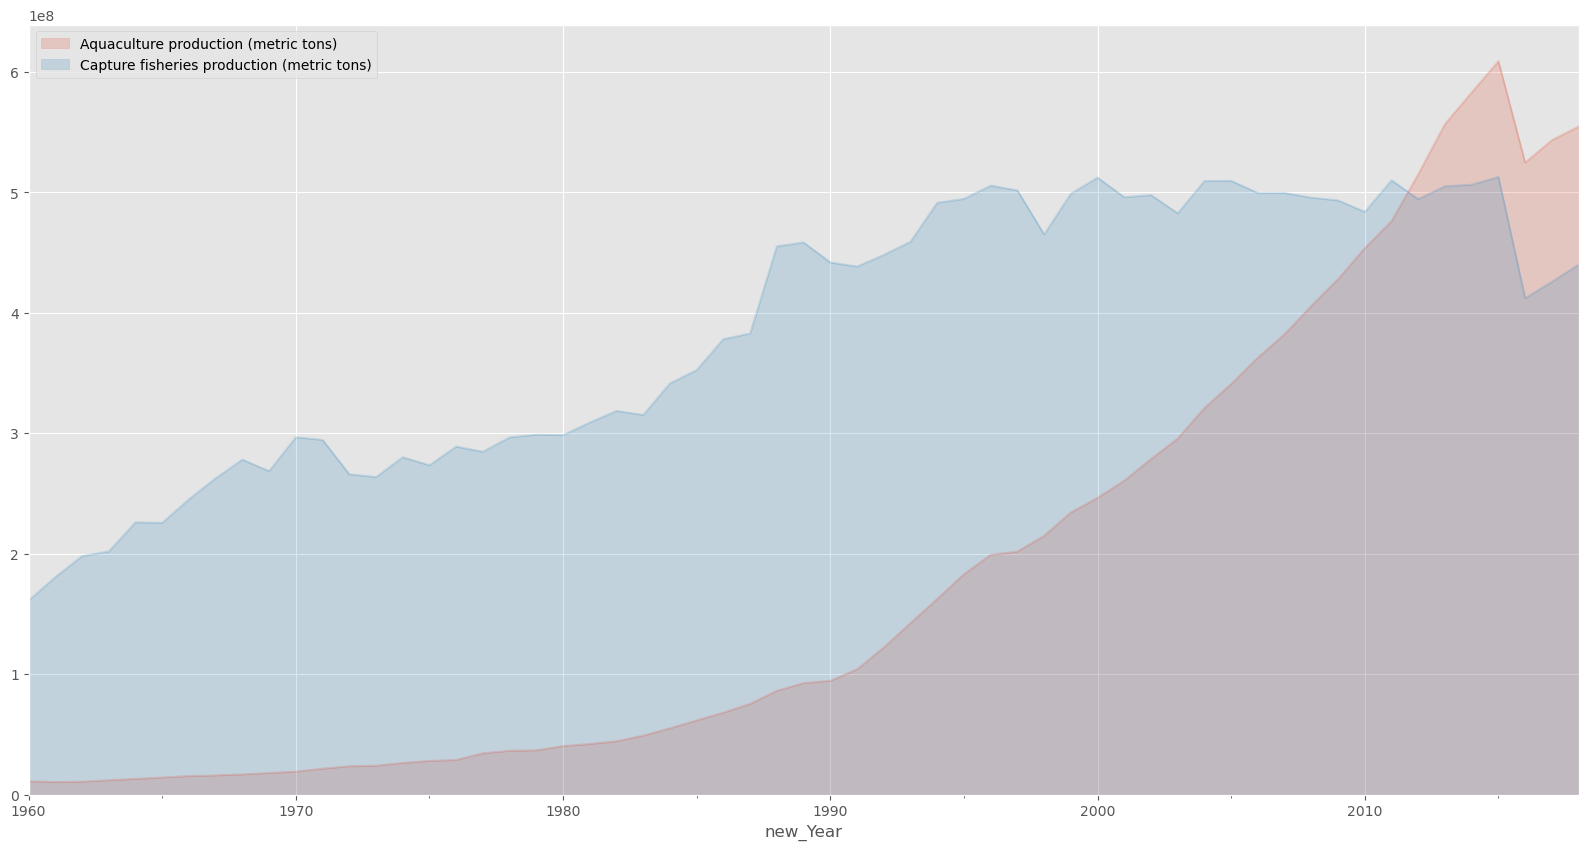

In [40]:
plt.style.use('ggplot')
world_total.plot(kind = 'area',
                alpha=0.2,
                stacked=False,
                figsize = (20,10))
plt.legend()
plt.show

In [43]:
country = new_df['Entity'].value_counts()
print(country)
print('Data type =>', type(country))

Afghanistan                   59
Portugal                      59
Myanmar                       59
Namibia                       59
Nauru                         59
                              ..
Serbia                        13
Saint Martin (French part)    12
Sint Maarten (Dutch part)      8
Curacao                        8
South Sudan                    7
Name: Entity, Length: 231, dtype: int64
Data type => <class 'pandas.core.series.Series'>


In [44]:
'South Korea' in country

True

In [45]:
s = new_df.loc[new_df['Entity']=='South Korea']
c = new_df.loc[new_df['Entity']=='China']
a = new_df.loc[new_df['Entity']=='Afganistan']

In [46]:
s_y = s[['Aquaculture production (metric tons)', 
         'Capture fisheries production (metric tons)']]
s_x = s.index

c_y = c[['Aquaculture production (metric tons)', 
         'Capture fisheries production (metric tons)']]
c_x = c.index

a_y = a[['Aquaculture production (metric tons)', 
         'Capture fisheries production (metric tons)']]
a_x = a.index

Text(0.5, 0.98, 'Fish Production')

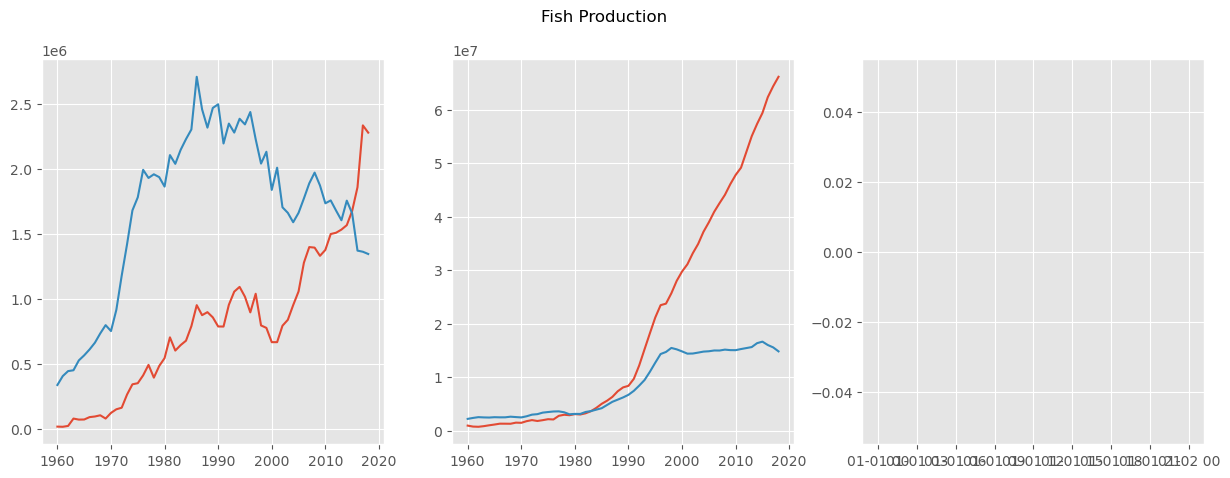

In [47]:
fig, axs = plt.subplots(1,3,figsize = (15,5))
axs[0].plot(s_x, s_y)
axs[1].plot(c_x, c_y)
axs[2].plot(a_x, a_y)

fig.suptitle('Fish Production')


In [ ]:
df = pd.read_csv('C:\Users\Kevin\Downloads\Telegram Desktop\covid-vaccination-doses-per-capita')
df.head()

In [ ]:
wti = pd.read_csv(r"C:\Users\Kevin\Downloads\DCOILWTICO.csv")
wti.head()

In [ ]:
print('hi')